<a href="https://colab.research.google.com/github/Dmitrijg24k/-NeuralNetwork/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Course_1_Part_8_Lesson_4_Notebook_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-02-07 07:35:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   321MB/s    in 0.2s    

2021-02-07 07:35:10 (321 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

Следующий код Python будет использовать библиотеку ОС для использования библиотек операционной системы, предоставляя вам доступ к файловой системе и библиотеке zipfile, позволяющей распаковать данные. 

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Содержимое .zip извлекается в базовый каталог `/tmp/horse-or-human`, каждый из которых, в свою очередь, содержит подкаталоги лошадей и людей.

В этом примере нужно обратить внимание на одну вещь: мы не обозначаем изображения явно как лошади или люди. Если вы помните в примере рукописных цифр ранее, мы пометили «это 1», «это 7» и т. Д. Позже вы увидите, что используется нечто, называемое ImageGenerator - он читает изображения из подкаталогов и сразу помечает их именами этого подкаталога. Так, например, у вас будет каталог 'training', содержащий каталог 'horse' и каталог 'people'. ImageGenerator создает массив данных из изображений, размеченными в соответствии с этими названиями, сокращая этап кодирования.

Давайте определим каждый из этих каталогов:

In [ ]:
train_dir = os.path.join('/tmp/cats_and_dogs_filtered/train')
validation_dir = os.path.join('/tmp/cats_and_dogs_filtered/validation')
train_cats_dir = os.path.join('/tmp/cats_and_dogs_filtered/train/cats')
train_dogs_dir = os.path.join('/tmp/cats_and_dogs_filtered/train/dogs')
validation_cats_dir = os.path.join('/tmp/cats_and_dogs_filtered/validation/cats')
validation_dogs_dir = os.path.join('/tmp/cats_and_dogs_filtered/validation/dogs')

Теперь давайте посмотрим, как выглядят имена файлов в каталогах обучения horses и humans и сколько там всего файлов:

In [ ]:
train_cats_names = os.listdir(train_cats_dir)
print(train_cats_names[:10])
print('total training cats images:', len(os.listdir(train_cats_dir)))

train_dogs_names = os.listdir(train_dogs_dir)
print(train_dogs_names[:10])
print('total training dogs images:', len(os.listdir(train_dogs_dir)))

['cat.3.jpg', 'cat.313.jpg', 'cat.933.jpg', 'cat.916.jpg', 'cat.82.jpg', 'cat.75.jpg', 'cat.660.jpg', 'cat.371.jpg', 'cat.996.jpg', 'cat.846.jpg']
total training cats images: 1000
['dog.715.jpg', 'dog.717.jpg', 'dog.949.jpg', 'dog.861.jpg', 'dog.341.jpg', 'dog.469.jpg', 'dog.566.jpg', 'dog.265.jpg', 'dog.711.jpg', 'dog.448.jpg']
total training dogs images: 1000


In [ ]:
# Установите Matplotlib fig и его размер, чтобы вывести 4x4 картинок
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Параметры для нашего графика; Мы будем выводить изображения в конфигурации 4х4
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Теперь покажите пакет из 8 изображений лошадей и 8 человек. Каждый раз, запуская эту ячейку вы увидите новый пакет:

In [ ]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; Индексы subplot начинаются с 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Не показывать оси (или линии сетки)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Создание маленькой модели с нуля
Но прежде чем мы продолжим, давайте определим модель:

Шаг 1 импортируем tensorflow.

In [ ]:
import tensorflow as tf

Затем мы добавляем сверточные слои, как в предыдущем примере, и вытягиваем конечный результат в одномерный массив для подачи в полносвязные слои.

Наконец мы добавляем плотно связанные слои.


Обратите внимание, что, поскольку мы сталкиваемся с проблемой классификации двух классов, то есть проблемой двоичной классификации, мы завершим нашу сеть с помощью функции активации [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), так что выход нашей сети - это один скаляр от 0 до 1, показывающий вероятность того, что текущее изображение относится к классу 1 (в противоположность классу 0).

In [ ]:
model = tf.keras.models.Sequential([
    # Обратите внимание, что входной формой является желаемый размер изображения 150x150 с 3 байтами цвета
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Только 1 выходной нейрон. Он будет содержать значение от 0 до 1, где 0 для 1 класса («лошади») и 1 для другого («люди»)
    tf.keras.layers.Dense(1, activation='sigmoid')
])


метод model.summary() печатает сводку нашей нейронной сети

In [ ]:
model.summary()

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Столбец «output shape» показывает, как изменяется размер вашей карты признаков в каждом следующем слое. Слои свертки немного уменьшают размер карт признаков из-за потерь на краях изображений, и каждый слой пуллинга сокращает размерности вдвое.

Далее мы настроим спецификации для обучения модели. Мы будем тренировать нашу модель с функцией потерь `binary_crossentropy`, потому что это задача бинарной классификации, а наша последняя активация - сигмоида. (Для получения дополнительной информации о показателях потерь см. [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) Мы будем использовать Оптимизатор `rmsprop` со скоростью обучения 0,001. Во время обучения мы хотим отслеживать точность классификации. ПРИМЕЧАНИЕ: в этом случае использование алгоритма оптимизации [RMSprop](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp)  предпочтительнее [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), потому что RMSprop автоматически настраивает скорость обучения для нас. (другие оптимизаторы, такие как [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) и [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) также автоматически адаптируют скорость обучения во время обучения, и будут работать здесь так же хорошо.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

###Предварительная обработка данных
Давайте настроим генераторы данных, которые будут читать изображения в наших исходных папках, преобразовывать их в тензоры `float32` и подавать их (с их метками) в нашу сеть. У нас будет один генератор для обучающих изображений и один для проверочных изображений. Наши генераторы будут выдавать партии изображений размером 150x150 и их метки (двоичные).

Как вы уже знаете, данные, поступающие в нейронные сети, обычно должны каким-то образом нормализоваться, чтобы сделать их более пригодными для обработки сетью. В нашем случае мы будем предварительно обрабатывать наши изображения путем нормализации значений пикселей, чтобы они находились в диапазоне `[0, 1]` (изначально все значения находятся в дипазоне `[0, 255]`).

В Keras это можно сделать с помощью класса `keras.preprocessing.image.ImageDataGenerator` с использованием параметра `rescale`. Этот класс `ImageDataGenerator` позволяет создавать экземпляры генераторов пакетов дополненных изображений (и их меток) с помощью `.flow(data, label` или `.flow_from_directory(dirname)`. Затем эти генераторы можно использовать с методами модели Keras, которые принимают генераторы данных в качестве входных данных: `fit_generator, evaluate_generator, и predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Все пиксели изображения будут пересчитаны 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# Поток обучающих изображений в партиях по 128 с использованием генератора train_datagen
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Это исходный каталог для тренировочных изображений
        target_size=(150, 150),  # все изображения будут изменены до 150x150
        batch_size=20,
        # поскольку мы используем функцию потерь binary_crossentropy, нам нужны двоичные метки
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # Это исходный каталог для проверочных изображений
        target_size=(150, 150),  # все изображения будут изменены до 150x150
        batch_size=20,
        # поскольку мы используем функцию потерь binary_crossentropy, нам нужны двоичные метки
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Тренировка
Давайте потренируемся 15 эпох - это может занять несколько минут. Обратите внимание на значения в эпохе.

`Loss и accuracy` являются отличными показателями прогресса обучения. Делается предположение о классификации обучающих данных, а затем оно сравнивается с известной меткой, вычисляя результат. `accuracy` - это доля правильных догадок.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 - 9s - loss: 0.8409 - acc: 0.5970 - val_loss: 0.5701 - val_acc: 0.6980
Epoch 2/100
50/50 - 9s - loss: 0.6198 - acc: 0.6620 - val_loss: 0.5990 - val_acc: 0.6880
Epoch 3/100
50/50 - 9s - loss: 0.6257 - acc: 0.6670 - val_loss: 0.5420 - val_acc: 0.7340
Epoch 4/100
50/50 - 9s - loss: 0.6226 - acc: 0.6690 - val_loss: 0.5505 - val_acc: 0.7350
Epoch 5/100
50/50 - 9s - loss: 0.6041 - acc: 0.6840 - val_loss: 0.5747 - val_acc: 0.6720
Epoch 6/100
50/50 - 9s - loss: 0.6164 - acc: 0.6730 - val_loss: 0.5260 - val_acc: 0.7490
Epoch 7/100
50/50 - 9s - loss: 0.5976 - acc: 0.6760 - val_loss: 0.4971 - val_acc: 0.7640
Epoch 8/100
50/50 - 9s - loss: 0.5841 - acc: 0.6930 - val_loss: 0.5451 - val_acc: 0.7250
Epoch 9/100
50/50 - 9s - loss: 0.5895 - acc: 0.7150 - val_loss: 0.5034 - val_acc: 0.7460
Epoch 10/100
50/50 - 9s - loss: 0.5723 - acc: 0.6940 - val_loss: 0.5031 - val_acc: 0.7440
Epoch 11/100
50/50 - 9s - loss: 0.6110 - acc: 0.6960 - val_loss: 0.5116 - val_acc: 0.7290
Epoch 12/100
50/50 

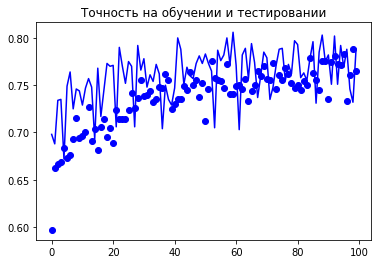

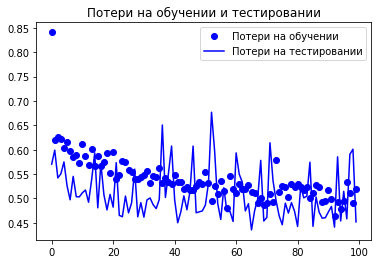

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,  
      epochs=100,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=50)
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Точность на обучении')
plt.plot(epochs, val_acc, 'b', label='Точность на тестировании')
plt.title('Точность на обучении и тестировании')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Потери на обучении')
plt.plot(epochs, val_loss, 'b', label='Потери на тестировании')
plt.title('Потери на обучении и тестировании')
plt.legend()
plt.show()

###Запуск модели
Давайте теперь посмотрим как на самом деле работает предсказание с использованием модели. Этот код позволит вам выбрать 1 или более файлов из вашей файловой системы, затем он загрузит их и проведет их через модель, указав, является ли объект лошадью или человеком.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Прогнозирование изображений
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

###Визуализация промежуточных представлений
Чтобы понять, какие признаки выявил наш коннет, нужно сделать одну интересную вещь - визуализировать, как преобразуется вход при его прохождении через коннет.

Давайте выберем случайное изображение из обучающего набора, а затем сгенерируем фигуру, где каждая строка является выходом слоя, а каждое изображение в строке является специальным фильтром в этой выходной карте объектов. Перезапустите эту ячейку, чтобы получить промежуточные представления для различных обучающих изображений.

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)

# определим новую модель, которая будет принимать изображение в качестве ввода и выводить
# промежуточные представления для всех слоев в  модели, начиная с первого.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# подготовим случайное входное изображение из тренировочного набора.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Масштабируем в 1/255
x /= 255

# пропустим наше изображение через нашу сеть, получив таким образом все
# промежуточные представления для этого изображения.
successive_feature_maps = visualization_model.predict(x)

# Это названия слоев, поэтому они могут быть частью нашего чертежа.
layer_names = [layer.name for layer in model.layers]

# Теперь давайте покажем наши представления
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Просто делаем это для слоев conv / maxpool, а не для полностью связанных слоев
    n_features = feature_map.shape[-1]  # Количество признаков на карте признаков
    # Карта объектов имеет форму (1, size, size, n_features)
    size = feature_map.shape[1]
    # Мы разместим наши изображения в этой матрице
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Постобработка функции
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # поместим каждый фильтр в большую горизонтальную сетку
      display_grid[:, i * size : (i + 1) * size] = x
    # Показать сетку
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Как вы можете видеть, мы переходим от необработанных пикселей изображений к все более абстрактным и компактным представлениям. Представления начинают выделять то, на что обращает внимание сеть, и они показывают, что все меньше и меньше признаков «активируются»; Большинство из них обнуляются. Это называется 'sparsity'. Разреженность представлений является ключевой особенностью глубокого обучения.

Эти представления несут все меньше информации об исходных пикселях изображения, но все более уточняют информацию о классе изображения. Вы можете представлять себе convNet (или глубокую сеть в целом) как о канале дистилляции информации.

##Очистить
Перед каждым выполнением упражнения запустите эту ячейку, чтобы завершить работу ядра и освободить ресурсы памяти:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)